In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim


In [4]:
# CHANGE THIS to your file
img_path = "../image1.jpg"

img_bgr = cv2.imread(img_path, cv2.IMREAD_COLOR)
if img_bgr is None:
    raise FileNotFoundError(f"Could not read {img_path}")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)


In [5]:
# amount controls proportion of corrupted pixels; salt_vs_pepper controls salt ratio
noisy_gray = (random_noise(img_gray, mode="s&p", amount=0.10, salt_vs_pepper=0.5) * 255).astype(np.uint8)


In [6]:
# kernel sizes must be odd (3, 5, 7, …)
den3 = cv2.medianBlur(noisy_gray, 3)
den5 = cv2.medianBlur(noisy_gray, 5)
den7 = cv2.medianBlur(noisy_gray, 7)


In [7]:
def metrics(ref, test):
    return psnr(ref, test, data_range=255), ssim(ref, test, data_range=255)

for k, im in [(3, den3), (5, den5), (7, den7)]:
    p, s = metrics(img_gray, im)
    print(f"Median k={k}:  PSNR={p:.2f} dB,  SSIM={s:.4f}")


Median k=3:  PSNR=38.15 dB,  SSIM=0.9802
Median k=5:  PSNR=34.72 dB,  SSIM=0.9562
Median k=7:  PSNR=31.78 dB,  SSIM=0.9227


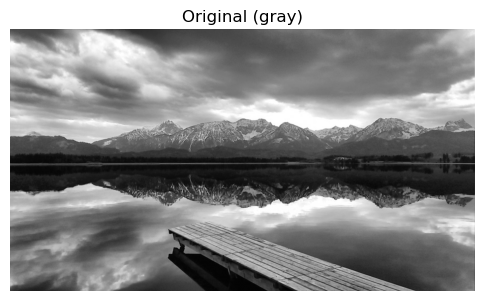

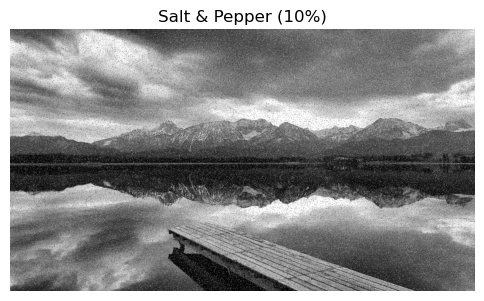

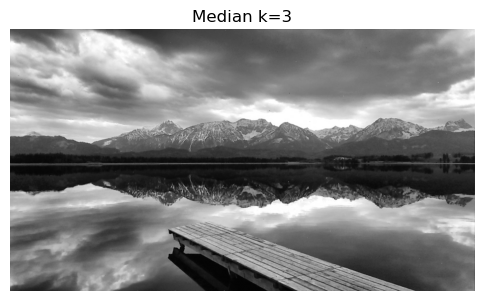

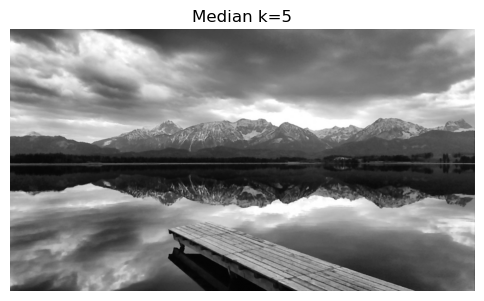

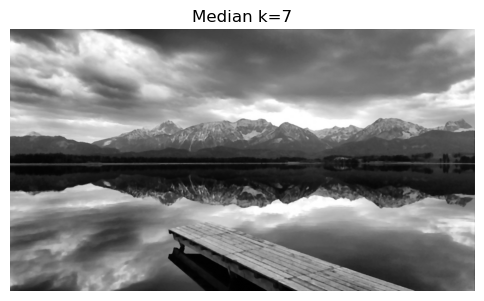

In [9]:
# Show Original
plt.figure(figsize=(6,6))
plt.imshow(img_gray, cmap="gray")
plt.title("Original (gray)")
plt.axis("off")
plt.show()

# Show Noisy
plt.figure(figsize=(6,6))
plt.imshow(noisy_gray, cmap="gray")
plt.title("Salt & Pepper (10%)")
plt.axis("off")
plt.show()

# Show Median k=3
plt.figure(figsize=(6,6))
plt.imshow(den3, cmap="gray")
plt.title("Median k=3")
plt.axis("off")
plt.show()

# Show Median k=5
plt.figure(figsize=(6,6))
plt.imshow(den5, cmap="gray")
plt.title("Median k=5")
plt.axis("off")
plt.show()

# Show Median k=7
plt.figure(figsize=(6,6))
plt.imshow(den7, cmap="gray")
plt.title("Median k=7")
plt.axis("off")
plt.show()